#### AI 헬스케어 첫번째 미니 프로젝트 “흡연 여부 데이터 분석을 통한 건강 인사이트 도출” 에 오신 1기 여러분 환영합니다.
이번 프로젝트에서는 흡연여부를 판단하는 데이터를 가지고 시각화 및 가설을 판별해보려고 합니다.


A-Z로 진행되는 만큼 천천히 따라해보세요!

#### 개인과제
- 데이터 구조, 분포 확인, 전처리 : 1.1_흡연여부데이터
- 데이터 간 관계 가설 수립 및 검증 : 1.2_데이터분석



### 흡연여부데이터 분석하기
최근 여러 기관에서는 흡연이 개인의 건강에 미치는 영향을 정확히 파악하고,
이를 기반으로 예방 중심의 건강관리 정책을 수립하려는 노력을 강화하고 있습니다.

하지만 “흡연 여부”를 직접 조사하는 것은 현실적으로 쉽지 않습니다.
이에 따라, 건강검진 데이터를 통해 흡연 여부를 데이터 기반으로 추정하고,
흡연자와 비흡연자 간의 생체·건강 지표 차이를 검증하려는 프로젝트가 시작되었습니다.

여러분은 이 프로젝트의 데이터 분석가이자 AI 엔지니어로 참여하게 되었습니다.
주어진 데이터에는 개인의 건강검진 결과(혈압, 혈당, 콜레스테롤, BMI 등)와
흡연 여부(label = 0 또는 1)가 포함되어 있습니다.

이제 여러분의 역할은 흡연 여부 데이터의 특성을 분석하고 시각화하며,
통계적 검정을 통해 변수 간 관계를 규명하는 것입니다.
시작해봅시다 !

#### 🎯 프로젝트 목표

	•	흡연자와 비흡연자 간의 건강 지표 차이 분석
	•	주요 변수들의 분포, 상관관계, 통계적 유의성 검증
	•	시각화를 통한 데이터 인사이트 도출
	•	추후 흡연 여부 예측 모델 개발을 위한 기초 분석 기반 마련




---



### 데이터 알아보기

#### 데이터 안내
- 'smoking_health_data.csv'
- 건강 정보 데이터


## 1. 데이터 불러오기
### 모든 데이터 분석의 시작은 '데이터 불러오기' 부터 입니다!
### 데이터 프레임을 불러오고 변수로 저장해봅시다!
- csv : pd.read_csv("파일이름. csv")
- txt : pd.read_csv("파일이름. csv", sep="구분자")
- xlsx : pd.read_excel('파일이름.xlsx')
- pickle : pd.read_pickle("파일이름.pkl")

[참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용됩니다)

In [2]:
# 필요한 라이브러리들 불러오기

import pandas as pd
import numpy as np



##### [TODO] 데이터 로딩
- Pandas 라이브러리를 활용해서 'smoking_health_data.csv' 파일을 'health_data' 변수에 저장하세요.
- 데이터 프레임의 크기를 확인해보세요. (shape)

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
health_data = pd.read_csv('smoking_health_data.csv')
health_data

FileNotFoundError: [Errno 2] No such file or directory: 'smoking_health_data.csv'

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

health_data.shape

(7000, 18)

## 기본 정보 확인 및 클렌징
- 데이터 클렌징이란 ? 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정입니다.

##### [TODO] 기본 정보 확인하기
- 'health_data' 데이터의 정보를 확인해보세요.
- 'describe', 'info', 'head', 'tail' 등 전부 활용해봅시다.

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

health_data.describe

<bound method NDFrame.describe of               ID  나이  키(cm)  몸무게(kg)    BMI    시력  충치  공복 혈당    혈압  중성 지방  \
0     TRAIN_0000  35    170       70  24.22  1.10   1   98.0  40.0   80.0   
1     TRAIN_0001  40    150       55  24.44  1.00   0  173.0  39.0  104.0   
2     TRAIN_0002  60    170       50  17.30  0.75   0   96.0  40.0   61.0   
3     TRAIN_0003  40    150       45  20.00  0.50   0   92.0  40.0   46.0   
4     TRAIN_0004  55    155       65  27.06   NaN   0   87.0  42.0   95.0   
...          ...  ..    ...      ...    ...   ...  ..    ...   ...    ...   
6995  TRAIN_6995  25    170       65  22.49  1.50   0   87.0  45.0  141.0   
6996  TRAIN_6996  60    165       65  23.88  0.90   0   87.0  45.0   82.0   
6997  TRAIN_6997  40    180      100  30.86  1.20   0   97.0  44.0   87.0   
6998  TRAIN_6998  60    150       55  24.44  0.60   0   89.0  57.0  161.0   
6999  TRAIN_6999  50    165       65  23.88  0.65   0  104.0  47.0  124.0   

      혈청 크레아티닌  콜레스테롤  고밀도지단백  저밀도지단백  헤모

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
health_data.info

<bound method DataFrame.info of               ID  나이  키(cm)  몸무게(kg)    BMI    시력  충치  공복 혈당    혈압  중성 지방  \
0     TRAIN_0000  35    170       70  24.22  1.10   1   98.0  40.0   80.0   
1     TRAIN_0001  40    150       55  24.44  1.00   0  173.0  39.0  104.0   
2     TRAIN_0002  60    170       50  17.30  0.75   0   96.0  40.0   61.0   
3     TRAIN_0003  40    150       45  20.00  0.50   0   92.0  40.0   46.0   
4     TRAIN_0004  55    155       65  27.06   NaN   0   87.0  42.0   95.0   
...          ...  ..    ...      ...    ...   ...  ..    ...   ...    ...   
6995  TRAIN_6995  25    170       65  22.49  1.50   0   87.0  45.0  141.0   
6996  TRAIN_6996  60    165       65  23.88  0.90   0   87.0  45.0   82.0   
6997  TRAIN_6997  40    180      100  30.86  1.20   0   97.0  44.0   87.0   
6998  TRAIN_6998  60    150       55  24.44  0.60   0   89.0  57.0  161.0   
6999  TRAIN_6999  50    165       65  23.88  0.65   0  104.0  47.0  124.0   

      혈청 크레아티닌  콜레스테롤  고밀도지단백  저밀도지단백  헤모글로

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 
health_data.head

<bound method NDFrame.head of               ID  나이  키(cm)  몸무게(kg)    BMI    시력  충치  공복 혈당    혈압  중성 지방  \
0     TRAIN_0000  35    170       70  24.22  1.10   1   98.0  40.0   80.0   
1     TRAIN_0001  40    150       55  24.44  1.00   0  173.0  39.0  104.0   
2     TRAIN_0002  60    170       50  17.30  0.75   0   96.0  40.0   61.0   
3     TRAIN_0003  40    150       45  20.00  0.50   0   92.0  40.0   46.0   
4     TRAIN_0004  55    155       65  27.06   NaN   0   87.0  42.0   95.0   
...          ...  ..    ...      ...    ...   ...  ..    ...   ...    ...   
6995  TRAIN_6995  25    170       65  22.49  1.50   0   87.0  45.0  141.0   
6996  TRAIN_6996  60    165       65  23.88  0.90   0   87.0  45.0   82.0   
6997  TRAIN_6997  40    180      100  30.86  1.20   0   97.0  44.0   87.0   
6998  TRAIN_6998  60    150       55  24.44  0.60   0   89.0  57.0  161.0   
6999  TRAIN_6999  50    165       65  23.88  0.65   0  104.0  47.0  124.0   

      혈청 크레아티닌  콜레스테롤  고밀도지단백  저밀도지단백  헤모글로빈 

##### [TODO] 위 데이터에서 BMI를 기준으로 체중 상태 구분 칼럼을 만들어보세요.
- BMI 구간을 기준으로 건강상태를 분류해볼까요 ?
- 저체중 (<18.5)
- 정상 (<25)
- 과체중 (<30)
- 비만 (>=30)


In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. a < x ≤ b <- right 기본값

health_data['BMIBand'] = pd.cut(health_data['BMI']
                                , bins=[0, 18.5, 25, 30,health_data["BMI"].max()+1]
                                , labels=['저체중','정상','과체중','비만']
                                , right=False) # a ≤ x < b

In [31]:
health_data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,BMIBand
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1,정상
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0,정상
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0,저체중
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0,정상
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0,정상
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1,정상
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0,비만
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0,정상


##### [TODO] 위 데이터에서 '나이'를 기준으로 나이대를 구분하는 칼럼을 만들어보세요.

'나이' 구간을 기준으로 나이대를 분류해볼까요 ?
- 30대 이하
- 30~50대
- 50~70대
- 70대 이상

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. a < x ≤ b <- right 기본값

health_data['AgeBand'] = pd.cut(health_data['나이']
                                , bins=[0,30,40,50,60,70,health_data["나이"].max()+1]
                                , labels=['30대이하','30대','40대','50대','60대','70대이상'])

In [40]:
health_data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,BMIBand,AgeBand
0,TRAIN_0000,35,170,70,24.22,1.10,1,98.0,40.0,80.0,1.3,211,75,120,15.9,1,1.53,1,정상,30대
1,TRAIN_0001,40,150,55,24.44,1.00,0,173.0,39.0,104.0,0.6,251,46,184,11.8,1,1.45,0,정상,30대
2,TRAIN_0002,60,170,50,17.30,0.75,0,96.0,40.0,61.0,0.8,144,43,89,15.3,1,1.04,0,저체중,50대
3,TRAIN_0003,40,150,45,20.00,0.50,0,92.0,40.0,46.0,0.7,178,66,110,13.4,1,1.18,0,정상,30대
4,TRAIN_0004,55,155,65,27.06,NaN,0,87.0,42.0,95.0,0.9,232,62,151,13.8,1,1.32,0,과체중,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87.0,45.0,141.0,1.2,184,44,112,14.9,1,1.50,0,정상,30대이하
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87.0,45.0,82.0,0.9,184,64,103,14.3,1,1.47,1,정상,50대
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97.0,44.0,87.0,0.9,178,54,107,15.6,1,1.00,0,비만,30대
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89.0,57.0,161.0,0.6,157,49,76,14.4,1,1.00,0,정상,50대


##### [TODO] 결측치 처리
결측치를 확인 했다면 분석 결과가 왜곡될 수 있으므로 반드시 확인하고 적절히 처리해야 합니다!

평균, 중앙값, 최빈값으로 채우는 것이 일반적이지만, 해당 변수의 의미를 고려해 선택해야 합니다.

예: 혈압은 중앙값, 시력은 최빈값, 나이대별 중성지방은 그룹 평균으로 채우기, 공복 혈당은 평균으로 채우기

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# NaN 데이타 확인

health_data.isna().sum().sort_values(ascending=False)


혈압          140
중성 지방       140
공복 혈당       140
시력          140
몸무게(kg)       0
키(cm)         0
나이            0
ID            0
충치            0
BMI           0
혈청 크레아티닌      0
콜레스테롤         0
고밀도지단백        0
저밀도지단백        0
헤모글로빈         0
요 단백          0
간 효소율         0
label         0
BMIBand       0
AgeBand       0
dtype: int64

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# min 값에 0이 있는지 확인
health_data[['혈압', '공복 혈당', '중성 지방', '시력']].describe()


,혈압,공복 혈당,중성 지방,시력
count,6860.000000,6860.000000,6860.000000,6860.000000
mean,45.555102,99.307289,127.028134,1.011414
std,8.831564,21.190058,73.219161,0.430137
min,14.000000,57.000000,21.000000,0.100000
25%,40.000000,89.000000,74.000000,0.800000
50%,45.000000,96.000000,107.000000,1.000000
75%,50.000000,104.000000,161.000000,1.200000
max,91.000000,386.000000,399.000000,9.900000


In [43]:
# ID처럼 문자열은 제외하고 수치형 컬럼만
numeric_cols = health_data.select_dtypes(include=[np.number]).columns

# 각 컬럼별 최소값 출력
health_data[numeric_cols].min().sort_values()

충치            0.00
label         0.00
혈청 크레아티닌      0.10
시력            0.10
간 효소율         0.14
요 단백          1.00
저밀도지단백        1.00
헤모글로빈         4.90
혈압           14.00
BMI          14.27
고밀도지단백       18.00
나이           20.00
중성 지방        21.00
몸무게(kg)      30.00
공복 혈당        57.00
콜레스테롤        86.00
키(cm)       135.00
dtype: float64

In [44]:
# 숫자가 아닌 컬럼들의 데이터 타입 확인
health_data.dtypes[health_data.dtypes == 'object']


ID    object
dtype: object

In [45]:
for col in health_data.columns:
    if health_data[col].dtype == 'object':
        # 숫자로 변환 가능한지 시도
        try:
            pd.to_numeric(health_data[col])
        except:
            print(f"⚠️ {col} : 숫자 외의 값이 섞여 있음")


⚠️ ID : 숫자 외의 값이 섞여 있음


In [ ]:
# 혹시 몰라 0 갯수 세보기
(health_data == 0).sum().sort_values(ascending=False)


충치          5408
label       4429
ID             0
나이             0
몸무게(kg)        0
키(cm)          0
시력             0
BMI            0
혈압             0
중성 지방          0
혈청 크레아티닌       0
공복 혈당          0
콜레스테롤          0
고밀도지단백         0
헤모글로빈          0
저밀도지단백         0
요 단백           0
간 효소율          0
BMIBand        0
AgeBand        0
dtype: int64

In [49]:
cols_zero_as_na = ['시력', '혈압', '공복 혈당', '중성 지방']

for col in cols_zero_as_na:
    # 각 (AgeBand, BMIBand) 그룹의 중앙값으로 대체
    health_data[col] = (
        health_data.groupby(['AgeBand', 'BMIBand'], observed=True)[col]
        .transform(lambda x: x.fillna(x.median()))
    )
    # 혹시 그룹 내 중앙값이 NaN이면 전체 중앙값으로 한 번 더 대체
    health_data[col] = health_data[col].fillna(health_data[col].median())



In [52]:
health_data.isna().sum().sort_values(ascending=False)

ID          0
나이          0
키(cm)       0
몸무게(kg)     0
BMI         0
시력          0
충치          0
공복 혈당       0
혈압          0
중성 지방       0
혈청 크레아티닌    0
콜레스테롤       0
고밀도지단백      0
저밀도지단백      0
헤모글로빈       0
요 단백        0
간 효소율       0
label       0
BMIBand     0
AgeBand     0
dtype: int64

## 3. 데이터 분석하기

KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
- 데이터들의 패턴 탐색
- 변수들간의 관계 파악

##### [TODO] 데이터 분포 알아보기
- 다양한 변수를 기준으로 그래프를 그려보고 변수 인사이트를 도출해보세요.
- 데이터의 형태와 분포를 시각화하면 이상치, 극단값, 데이터 패턴을 쉽게 파악할 수 있습니다 !

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import matplotlib.pyplot as plt
import seaborn as sns

# ① 폰트 설정 (Windows 기본 폰트: 맑은 고딕)
plt.rcParams.update({
    "font.family": "Malgun Gothic",  # 윈도우 기본 한글 폰트
    "font.size": 10,
    "axes.unicode_minus": False,     # 마이너스 깨짐 방지
})

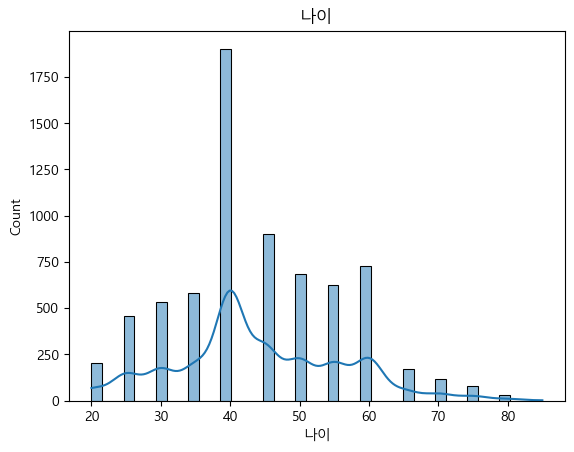

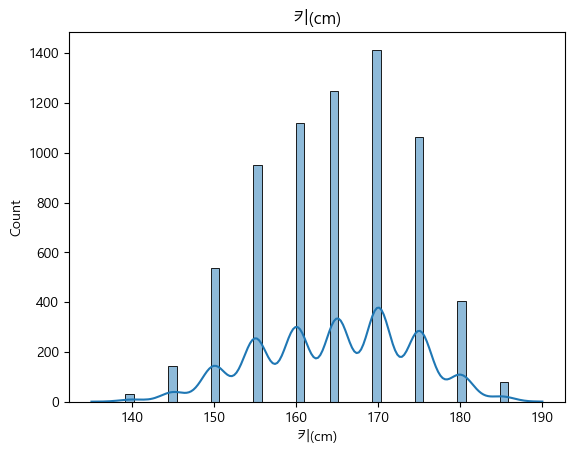

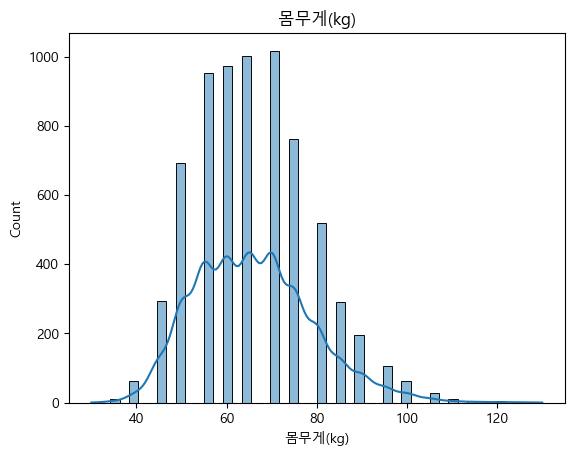

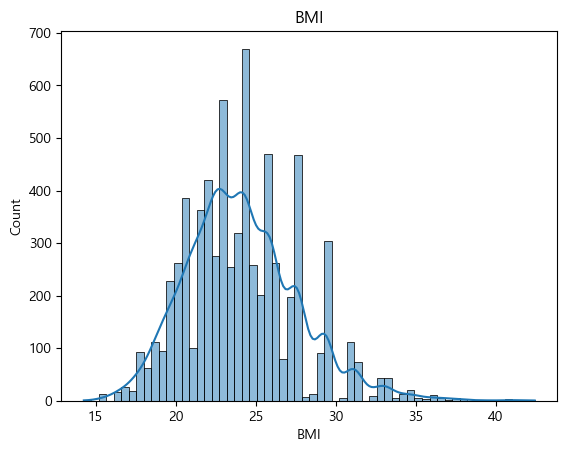

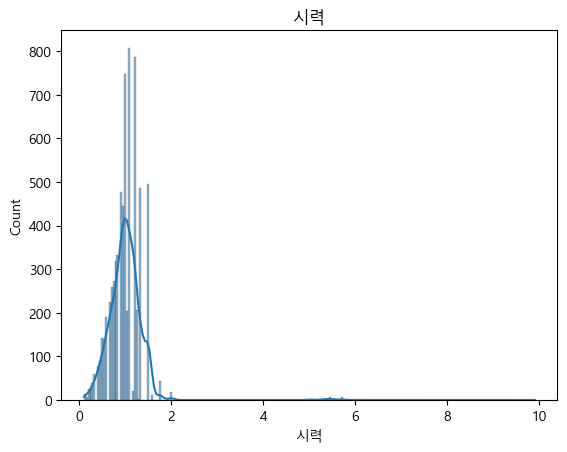

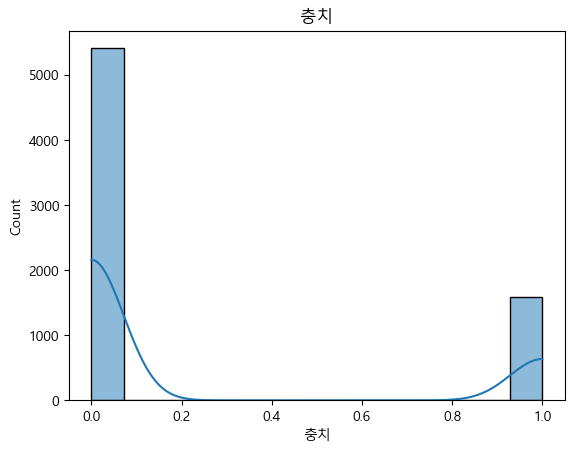

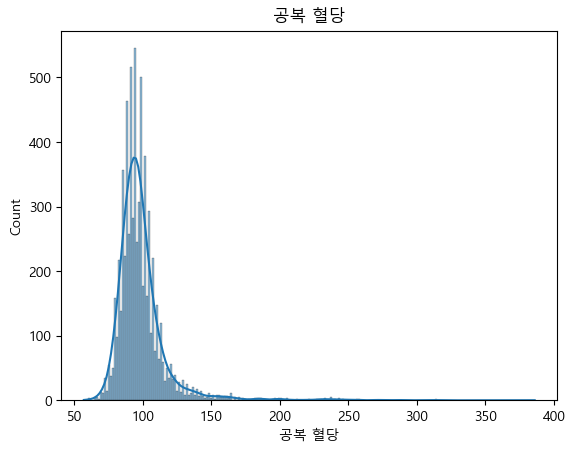

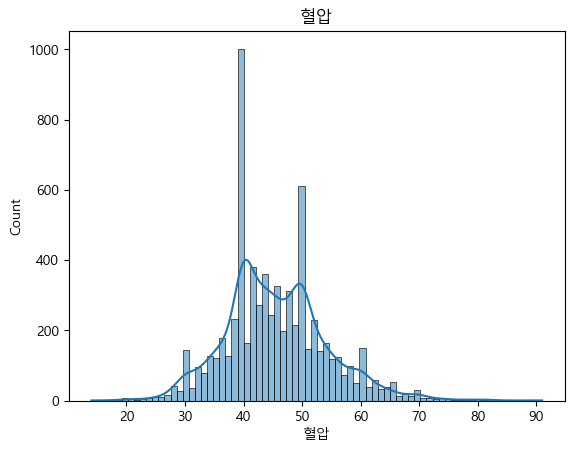

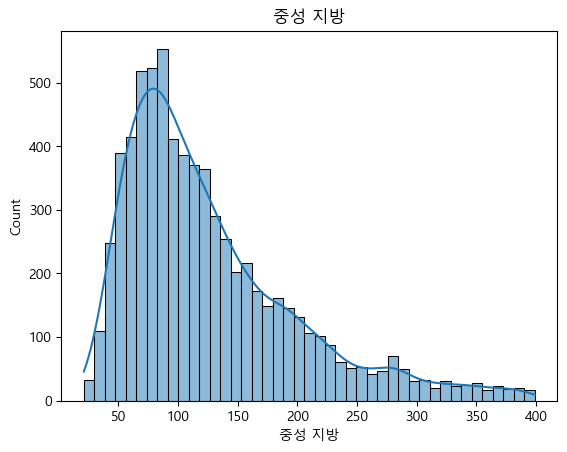

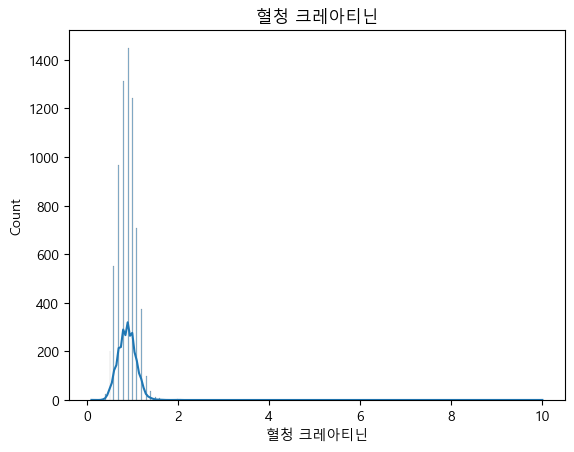

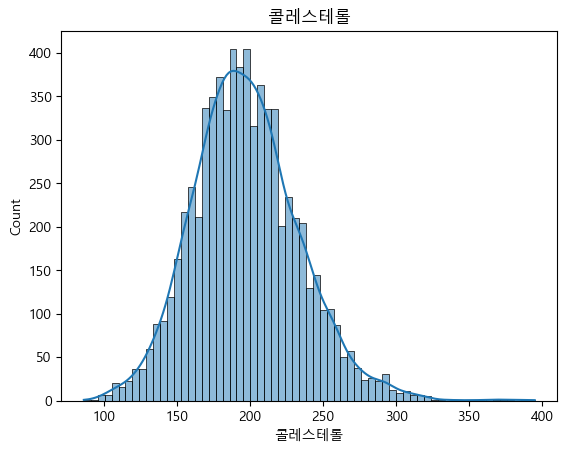

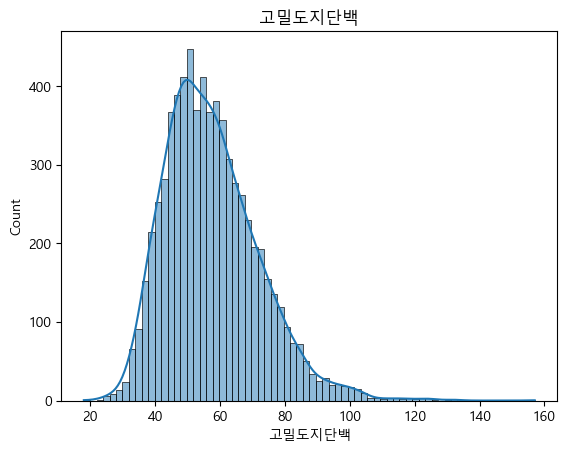

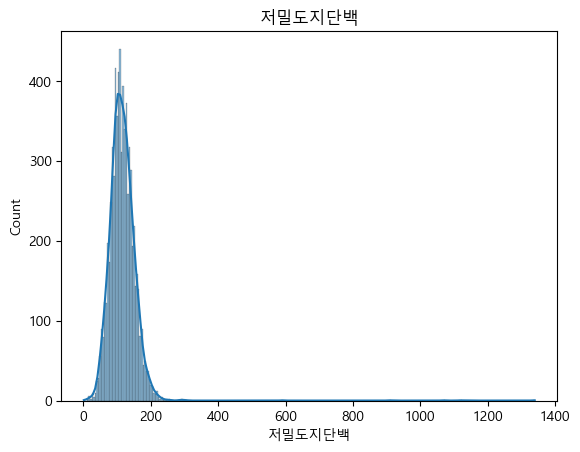

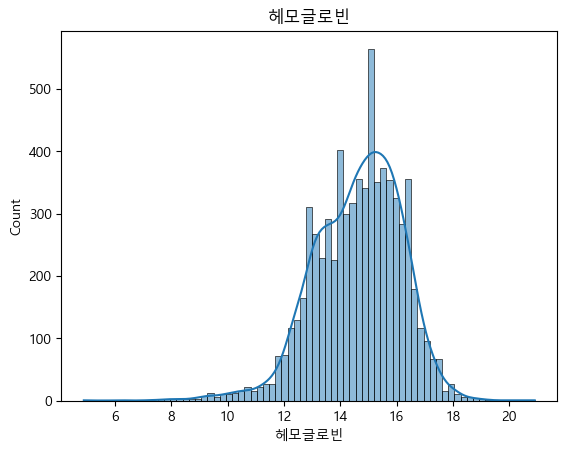

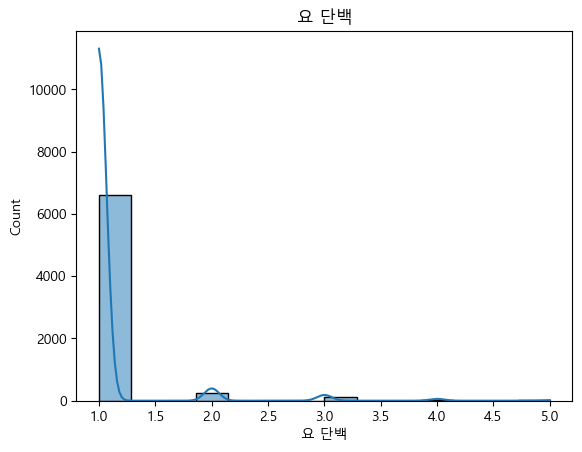

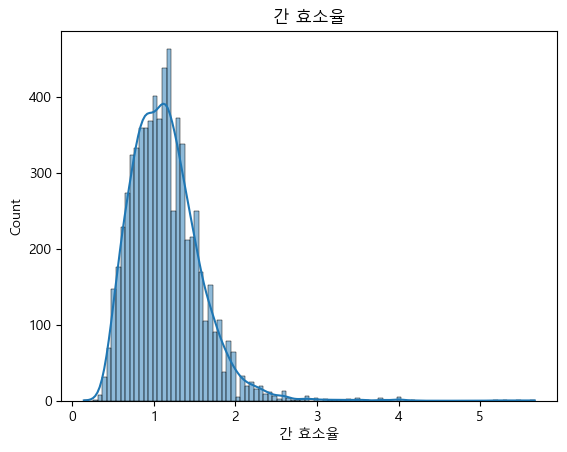

In [68]:
# ID,나이,키(cm),몸무게(kg),
# BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label

gp_cols = ["나이","키(cm)","몸무게(kg)","BMI","시력","충치","공복 혈당","혈압","중성 지방","혈청 크레아티닌","콜레스테롤","고밀도지단백","저밀도지단백","헤모글로빈","요 단백","간 효소율"]

for c in gp_cols:
    sns.histplot(health_data[c], kde=True)
    plt.title(c)
    plt.show()

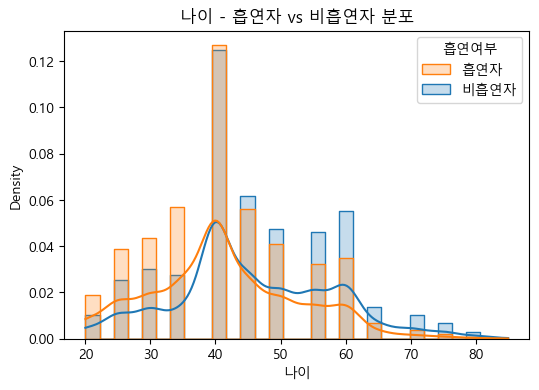

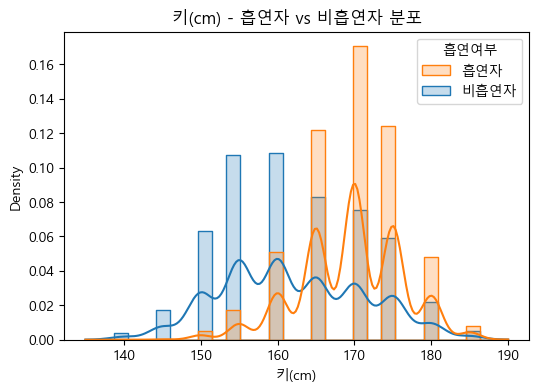

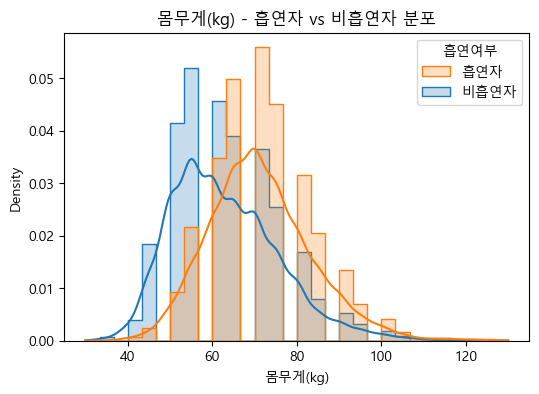

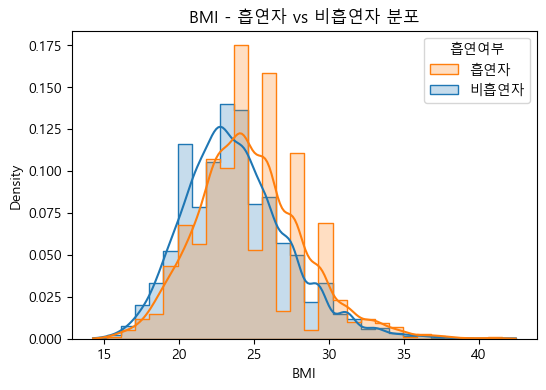

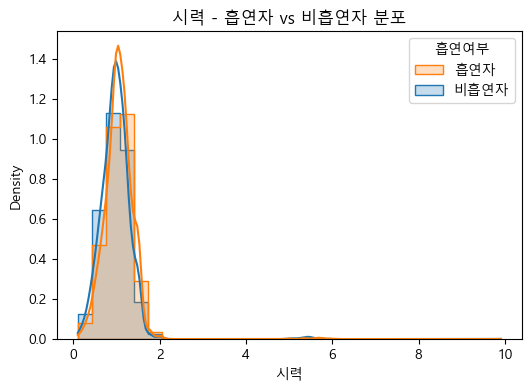

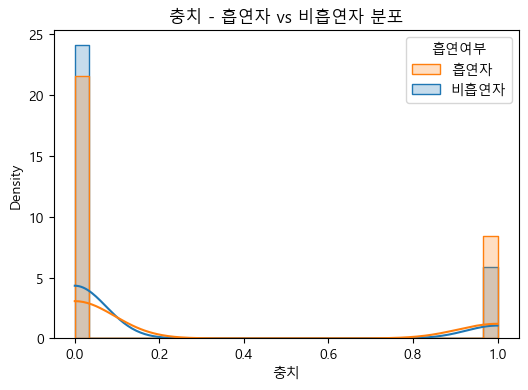

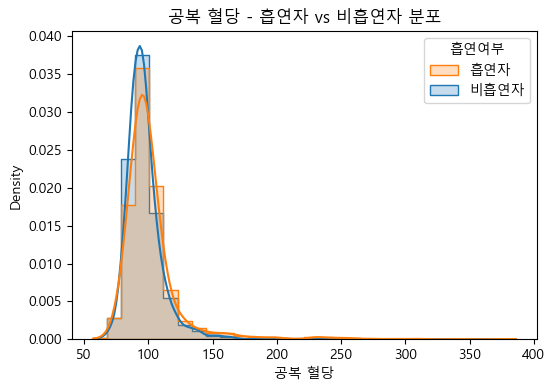

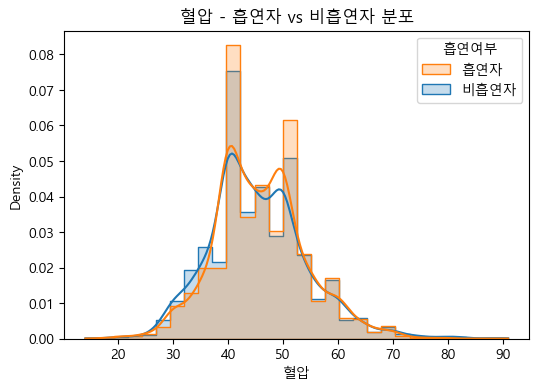

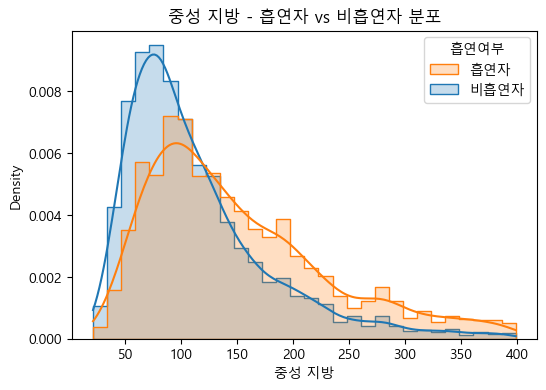

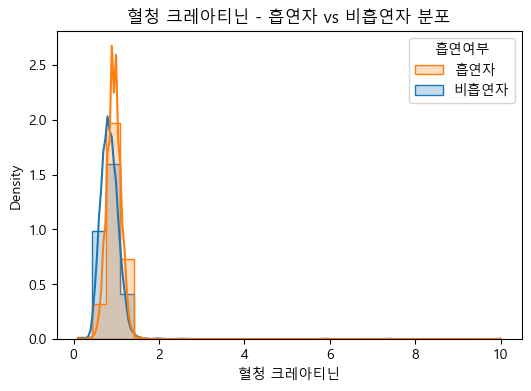

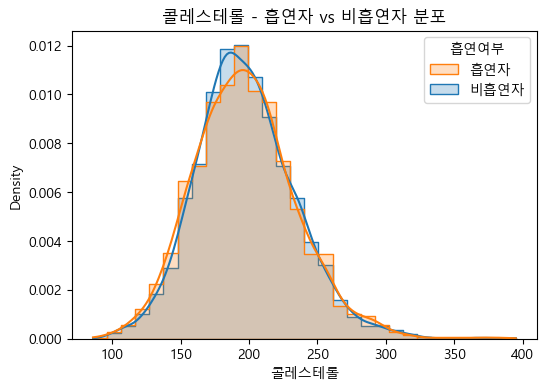

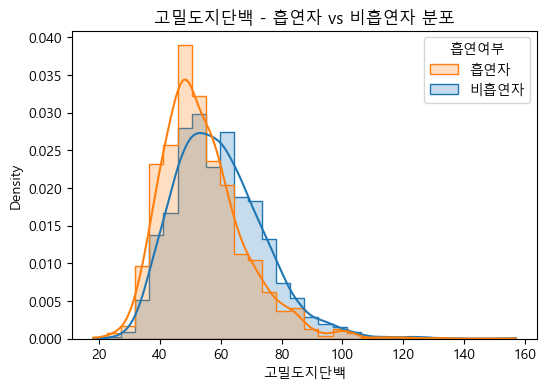

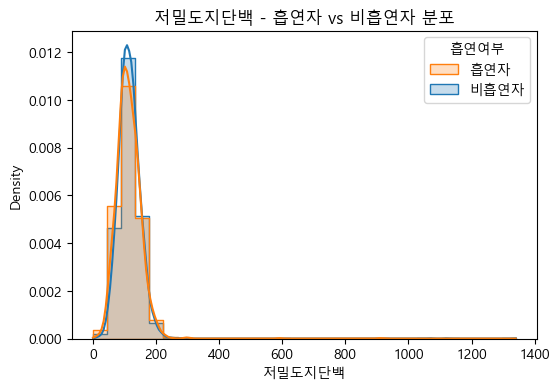

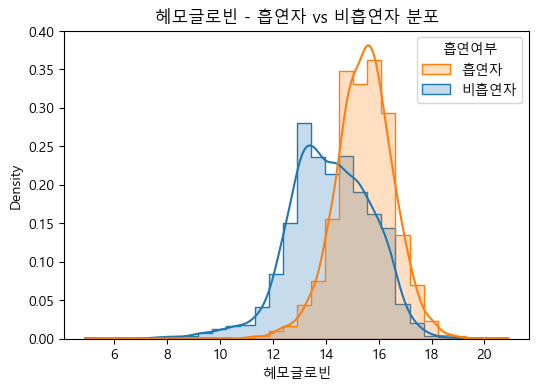

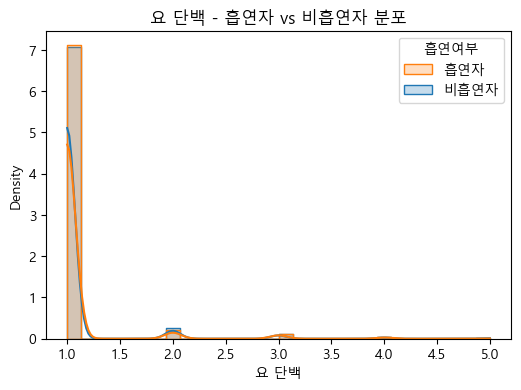

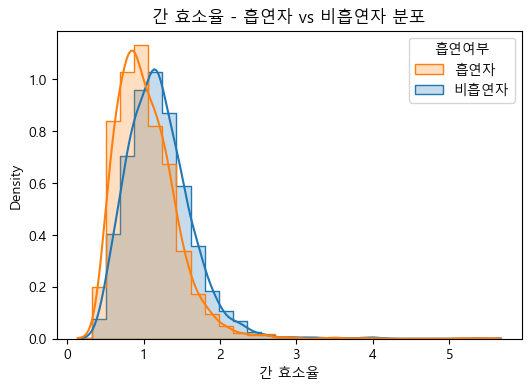

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# 0/1 → 한글 라벨로 매핑
health_data['흡연여부'] = health_data['label'].map({0: '비흡연자', 1: '흡연자'})

palette = {'비흡연자': 'tab:blue', '흡연자': 'tab:orange'}

for c in gp_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=health_data, x=c, hue='흡연여부', kde=True,
        bins=30, element='step', stat='density', common_norm=False,
        palette=palette, legend=True
    )
    plt.title(f'{c} - 흡연자 vs 비흡연자 분포')
    plt.show()


In [58]:
# 위 시각화를 통해 알게된 사실을 정리해봅시다.

health_data['label'].value_counts(normalize=True)


label
0    0.632714
1    0.367286
Name: proportion, dtype: float64

In [59]:
health_data.groupby('label')[['나이','BMI','혈압','공복 혈당','중성 지방','간 효소율']].mean()


,나이,BMI,혈압,공복 혈당,중성 지방,간 효소율
label,,,,,,
0,45.579138,23.807094,45.420862,97.472793,113.094152,1.205283
1,41.207701,24.725531,45.750875,102.290354,150.111824,1.040323


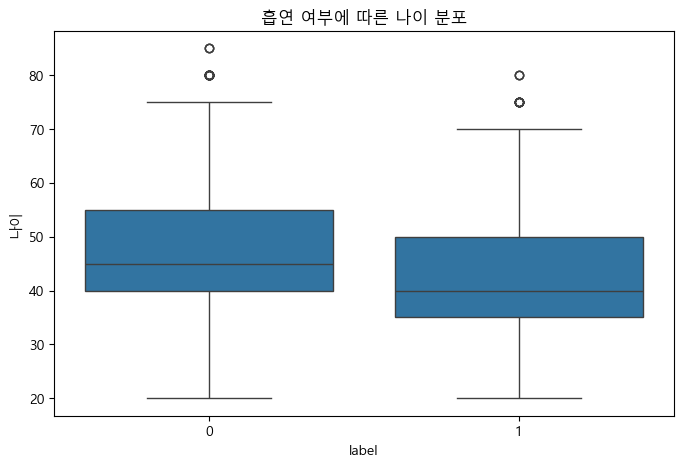

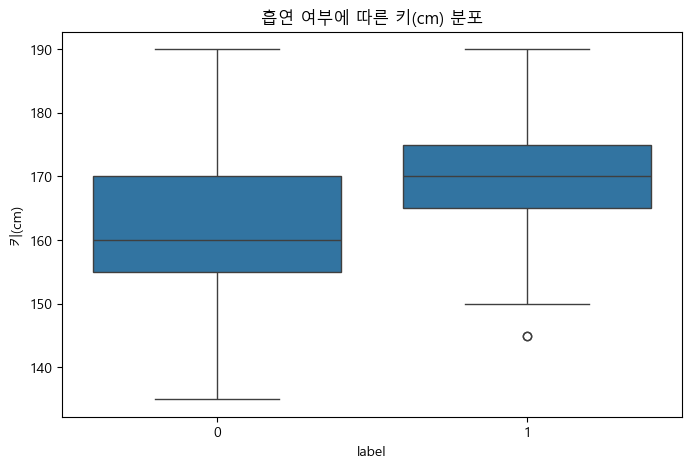

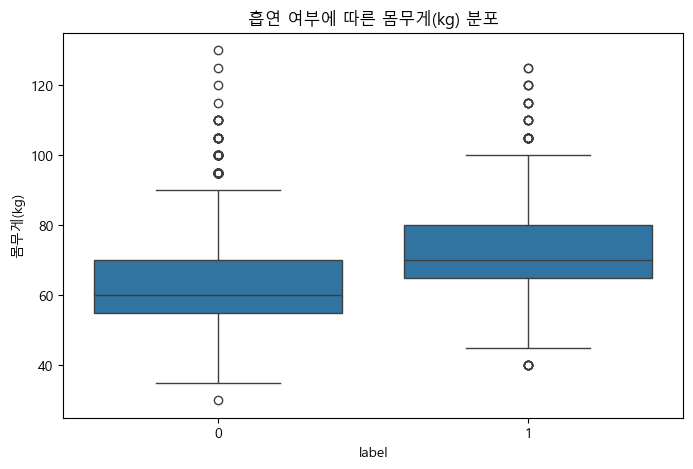

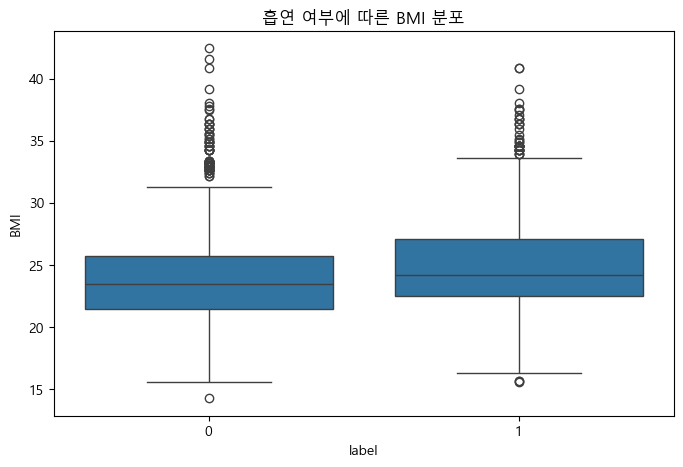

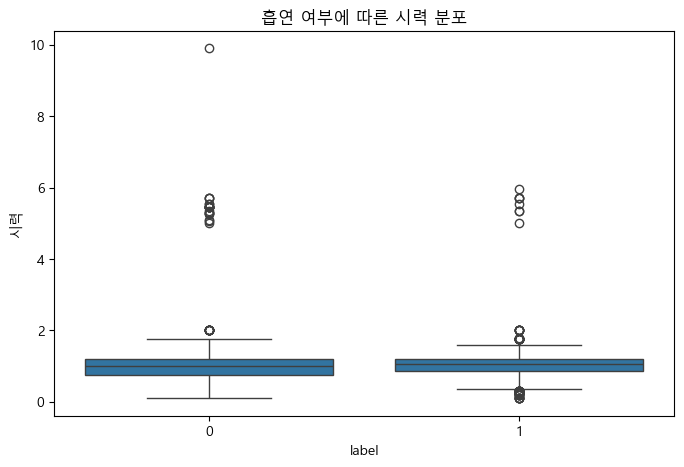

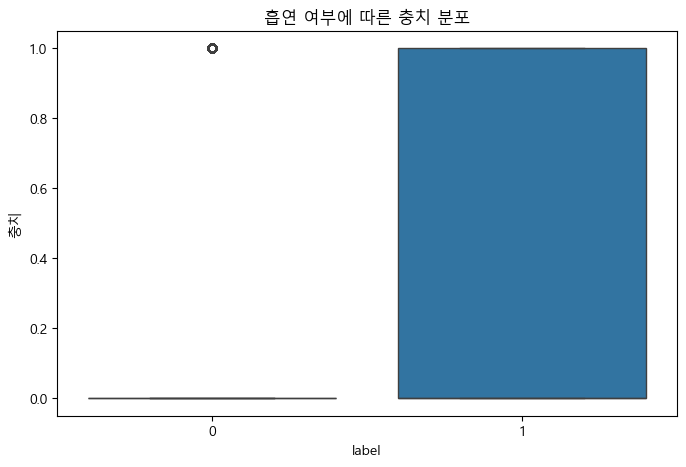

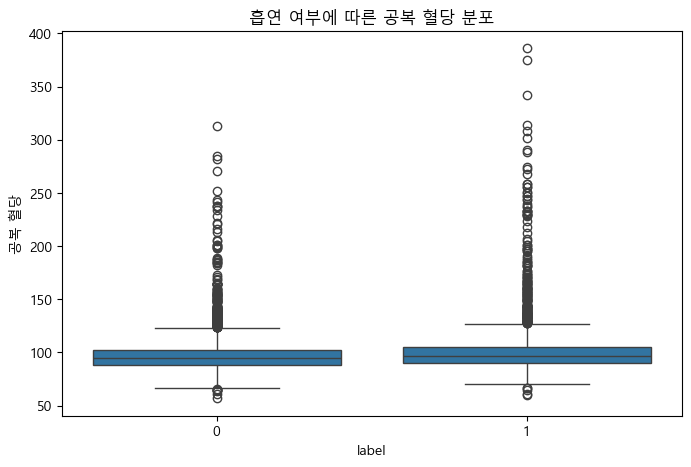

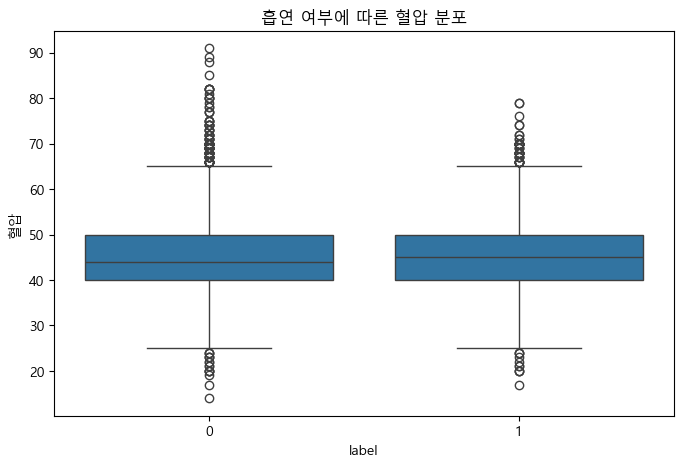

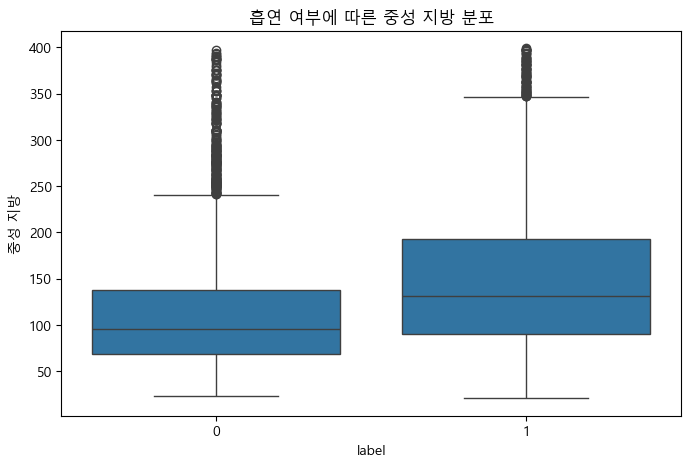

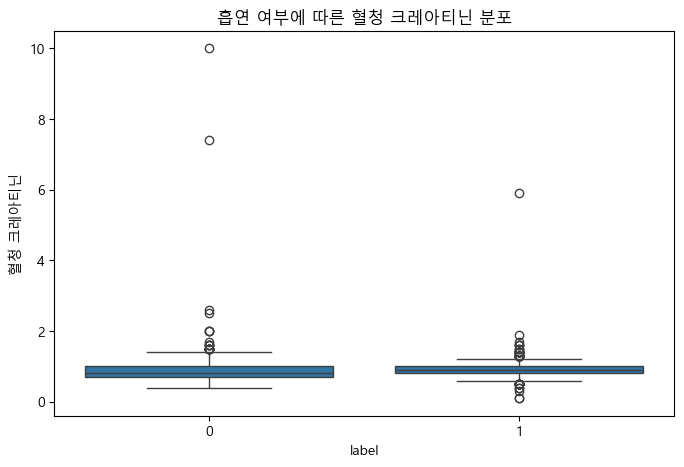

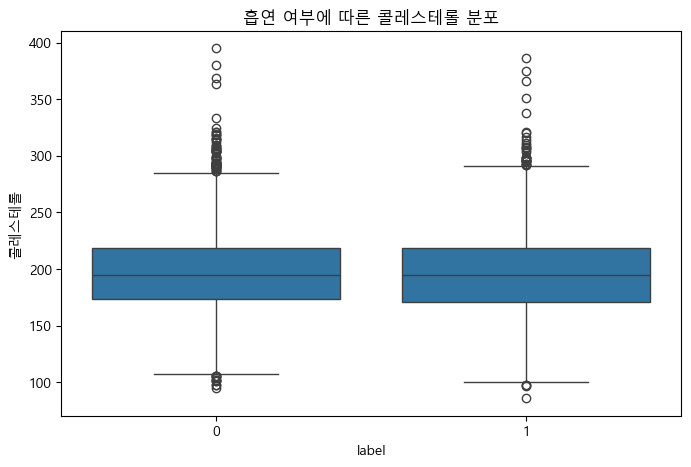

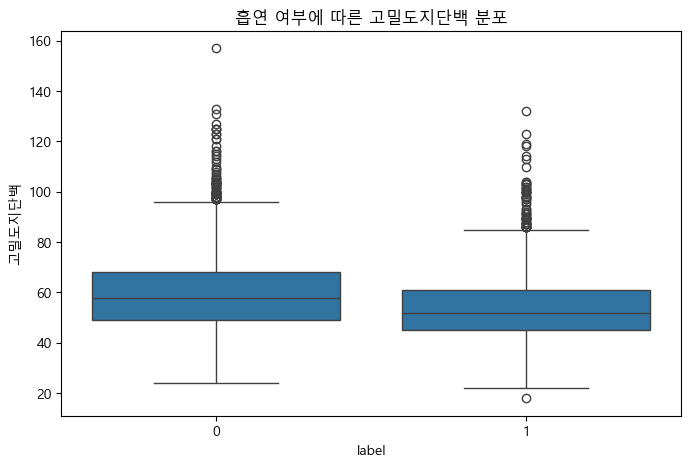

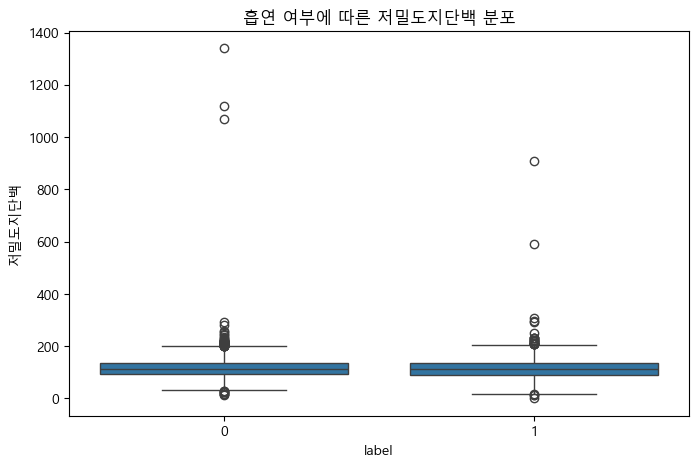

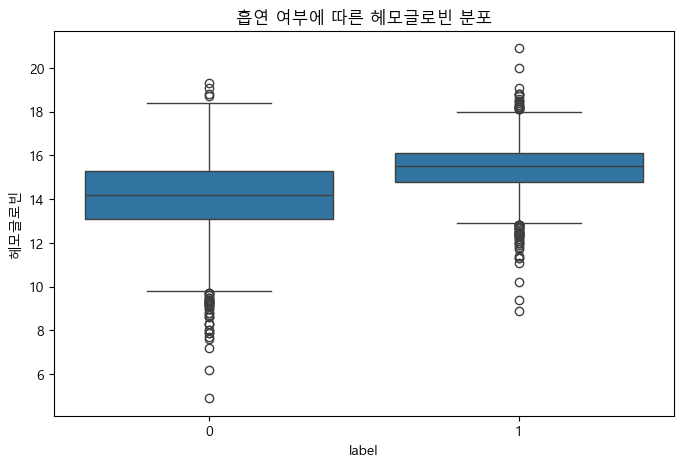

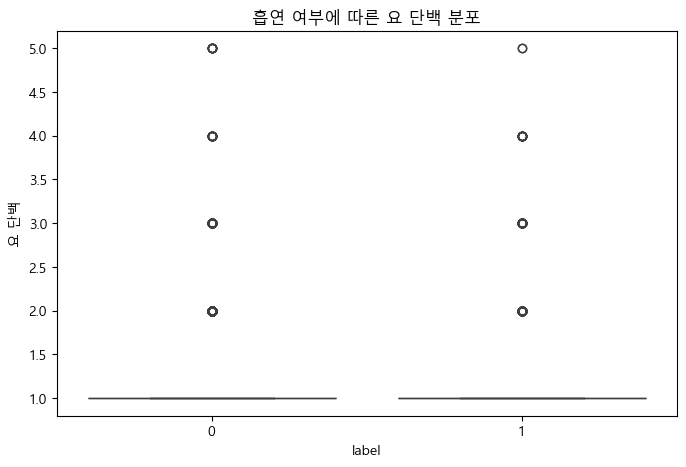

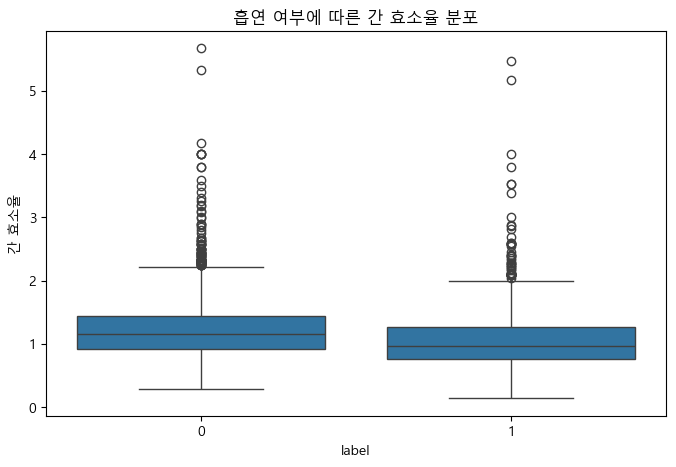

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

for c2 in gp_cols :
    plt.figure(figsize=(8,5))
    sns.boxplot(data=health_data, x='label', y=c2)
    plt.title(f'흡연 여부에 따른 {c2} 분포')
    plt.show()


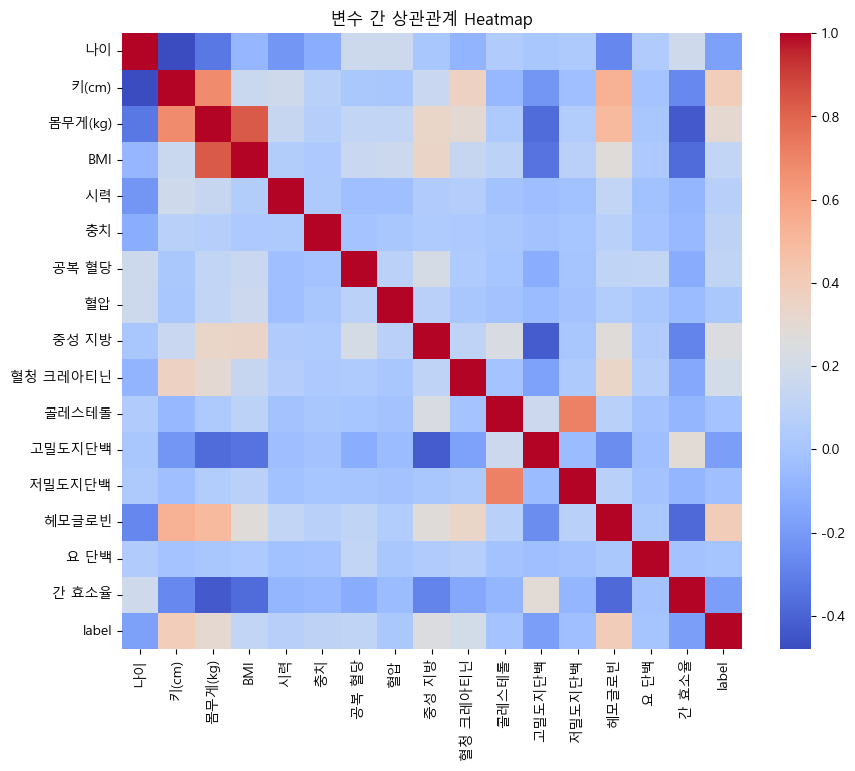

In [61]:
corr = health_data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('변수 간 상관관계 Heatmap')
plt.show()


In [62]:
pd.crosstab(health_data['BMIBand'], health_data['label'], normalize='index') * 100


label,0,1
BMIBand,,
저체중,71.739130,28.260870
정상,67.246175,32.753825
과체중,55.709508,44.290492
비만,54.269972,45.730028


In [74]:
import statsmodels.api as sm
X = health_data[['중성 지방', '헤모글로빈', '간 효소율', '시력', 'BMI', '나이']]
y = health_data['label']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.550941
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6993
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.1621
Time:                        16:34:42   Log-Likelihood:                -3856.6
converged:                       True   LL-Null:                       -4602.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2982      0.470    -19.789      0.000     -10.219      -8.377
중성 지방          0.0051      0.

In [1]:
sns.heatmap(health_data.corr(numeric_only=True), cmap='coolwarm')


NameError: name 'sns' is not defined